# Importing libraries

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Reading data 
df = pd.read_csv('cars_raw.csv')

In [5]:
#Visualizing first 5 rows
df.head()

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


In [6]:
#Description of the data in the DataFrame
df.describe()

,Year,ConsumerRating,ConsumerReviews,SellerRating,SellerReviews,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,MinMPG,MaxMPG,Mileage
count,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000
mean,2018.721719,4.702825,133.187014,4.412571,984.089988,4.771895,4.727391,4.696290,4.537083,4.782194,4.681746,22.755411,29.216548,37463.023350
std,2.221708,0.240795,154.985640,0.626258,1609.039864,0.217822,0.194391,0.253664,0.338098,0.171537,0.368161,14.812869,12.809783,24970.342569
min,2001.000000,2.500000,1.000000,1.000000,1.000000,3.000000,2.800000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,121.000000
25%,2018.000000,4.700000,30.000000,4.300000,112.000000,4.700000,4.700000,4.600000,4.500000,4.700000,4.600000,18.000000,25.000000,18666.500000
50%,2019.000000,4.800000,75.000000,4.600000,542.000000,4.800000,4.800000,4.700000,4.600000,4.800000,4.800000,20.000000,27.000000,32907.000000
75%,2020.000000,4.800000,182.000000,4.800000,1272.000000,4.900000,4.800000,4.800000,4.700000,4.900000,4.900000,24.000000,31.000000,47698.000000
max,2022.000000,5.000000,817.000000,5.000000,27824.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,150.000000,133.000000,234114.000000


In [7]:
#information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9379 entries, 0 to 9378
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9379 non-null   int64  
 1   Make                   9379 non-null   object 
 2   Model                  9379 non-null   object 
 3   Used/New               9379 non-null   object 
 4   Price                  9379 non-null   object 
 5   ConsumerRating         9379 non-null   float64
 6   ConsumerReviews        9379 non-null   int64  
 7   SellerType             9379 non-null   object 
 8   SellerName             9379 non-null   object 
 9   SellerRating           9379 non-null   float64
 10  SellerReviews          9379 non-null   int64  
 11  StreetName             9379 non-null   object 
 12  State                  9379 non-null   object 
 13  Zipcode                9379 non-null   object 
 14  DealType               9157 non-null   object 
 15  Comf

# DATA CLEANING

Looking into the 'Price' column we can see that it is currently a categorical column. We need to convert it into an integer column. There are some values as 'Not Priced' which needs to be removed. The dollar sign and comma sign in the Price needs to be replaced too.

PRICE COLUMN

In [8]:
df = df[df['Price'] != 'Not Priced']

In [9]:
df['Price'] = df['Price'].str.replace('$','').str.replace(',','')

In [10]:
df['Price'] = df['Price'].astype(int)

In [11]:
#Filling the missing values in DealType column with the mode of that column
df['DealType'] = df['DealType'].fillna(df['DealType'].mode()[0])

In [12]:
df['Transmission'].unique()

array(['8-Speed Automatic', '10-Speed Automatic', 'Automatic CVT',
       '5-Speed Automatic', '7-Speed Automatic', '9-Speed Automatic',
       '6-Speed Automatic', 'Automatic', '6-Speed A/T',
       '7-Speed Automatic with Auto-Shift',
       'Transmission w/Dual Shift Mode', '7-Speed A/T', 'A/T',
       '8-SPEED A/T', '8-Speed Automatic with Auto-Shift', '8-Speed A/T',
       '1-Speed A/T', '9-SPEED A/T', 'driver adaptive 7 speed automatic',
       '6-SPEED A/T', '5-SPEED M/T', '4-Speed Automatic', '6-Speed M/T',
       '8 speed tiptronic s automatic', '1-Speed Automatic',
       'Automatic with Overdrive', 'CVT 7-Speed', 'Automatic 5-Speed',
       '9-Speed A/T', '–', 'CVT', 'Variable', 'sport automatic', 'Manual',
       '6-Speed Automatic with Auto-Shift', '6-Speed Manual',
       '5-SPEED A/T', '6-Speed Automatic with Overdrive', '7-SPEED A/T',
       '9g tronic automatic', '5-Speed Manual', 'Automatic 6-Speed',
       '1 speed automatic', 'CVT Lineartronic', '10-Speed A/T',
    

In [13]:
#Removing the rows having data like '-'
df.drop(df[df["Transmission"]=='–'].index, inplace=True)

In [14]:
def trans(x):
    if 'AUTOMATIC' in x or 'Automatic' in x or 'automatic' in x or 'CVT' in x or 'cvt' in x or 'variable' in x or 'Auto' in x or 'auto' in x or 'A/T' in x:
        return 'Automatic'
    if 'M/T' in x or 'manual' in x or 'Manual' in x or 'Dual Shift' in x or 'Double-clutch' in x or 'PDK' in x:
        return 'Manual'
    else:
        return 'Automatic'

In [15]:
df['Transmission'] = df['Transmission'].apply(trans)

In [16]:
df['Engine'].unique()

array(['3.5L V6 24V PDI DOHC', '3.5L V6 24V PDI DOHC Twin Turbo',
       '5.7L V8 16V MPFI OHV', '1.5L I4 16V GDI DOHC Turbo',
       '4.0L V6 24V MPFI DOHC', '1.8L I4 16V MPFI SOHC',
       '3.5L V6 24V GDI DOHC', '3.5L V6 24V GDI SOHC',
       '6.4L V8 16V MPFI OHV', '3.5L V6 24V MPFI DOHC',
       '2.0L H4 16V GDI DOHC', 'Regular Unleaded V-6 3.5 L/213',
       '2.3L I4 16V GDI DOHC Turbo', '2.0L I4 16V GDI DOHC Turbo',
       '2.5L H4 16V GDI DOHC', '3.0L I6 24V GDI DOHC Turbo',
       '248.0HP 3.5L V6 Cylinder Engine Gasoline Fuel',
       '2.4L H4 16V GDI DOHC Turbo',
       '240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel',
       '3.6L V6 24V GDI DOHC',
       '328.0HP 3.7L V6 Cylinder Engine Gasoline Fuel',
       '382.0HP Electric Motor Electric Fuel System',
       'Regular Unleaded V-6 3.5 L/212', 'Straight 6 Cylinder Engine',
       '2.4L I4 16V GDI DOHC', '3.6L V6 24V MPFI DOHC',
       '380.0HP 3.0L V6 Cylinder Engine Gasoline Fuel',
       '5.0L V8 32V GDI DOHC Supercharge

In [17]:
#Extracting the fuel capacity of the engine using regular expression
df['Cap'] = df['Engine'].str.findall(r'[0-9].[0-9]L') + df['Engine'].str.findall(r'[0-9].[0-9] L')

In [18]:
df['Cap'] = df['Cap'].apply(lambda x : '0.0' if len(x) == 0 else ' '.join(x)).str.replace(' ','').str.replace('L','')

In [19]:
df['Cap'] = df['Cap'].astype(float)

In [20]:
def test(x):
    if x == 0.0 :
        return np.nan
    else:
        return x
df['Capacity'] = df['Cap'].apply(test).fillna(df['Cap'].mean()).apply(lambda x: round(x,1))

In [21]:
df.drop('Cap', axis = 1, inplace = True)

DRIVE TRAIN COLUMN

In [22]:
df.drop(df[df["Drivetrain"]=='–'].index, inplace=True)

In [23]:
df['Drivetrain'].unique()

array(['Front-wheel Drive', 'Four-wheel Drive', 'Rear-wheel Drive',
       'All-wheel Drive', '4WD', 'AWD', 'RWD', 'FWD', 'Front Wheel Drive'],
      dtype=object)

In [24]:
def drive(x):
    if x == 'Front-wheel Drive' or x == 'Front Wheel Drive' or x == 'FWD':
        return 'FWD'
    if x == 'Four-wheel Drive' or x == 'All-wheel Drive' or x == '4WD' or x == 'AWD':
        return 'AWD'
    if x == 'Rear-wheel Drive' or x == 'RWD':
        return 'RWD'
df['Drivetrain'] = df['Drivetrain'].apply(drive)

In [25]:
#Removing the rows having data like '-'
df.drop(df[df["FuelType"]=='–'].index, inplace=True)

In [26]:
def fuel(x):
    if x == 'Gasoline' or x == 'Gasoline Fuel':
        return 'Gasoline'
    if x == 'Electric Fuel System' or x == 'Electric':
        return 'Electric'
    if x == 'Flexible Fuel' or x == 'E85 Flex Fuel':
        return 'Flex'
    else:
        return 'Hybrid'
df['Fuel'] = df['FuelType'].apply(fuel)

In [27]:
df.drop('FuelType', axis = 1, inplace = True)

In [28]:
df['State'].unique()

array(['CA', 'NV', 'AZ', 'UT', 'ID', 'WA', 'TX', 'NE', 'KS', 'MN', 'WI',
       'MO', 'LA', 'IL', 'TN', 'IN', 'GA', 'OH', 'SC', 'FL', 'VA', 'PA',
       'NJ', 'NY', 'MA', 'OR', 'CO', 'OK', 'AR', 'MI', 'NC', 'MD', 'DE',
       'NH', 'SD', 'AL', 'KY', 'VT', 'IA', 'CT', 'MS', 'RI', 'HI', 'RT',
       'ND', 'Michigan', 'WV', 'Bldg', 'NM', 'ME', 'AZ-101', 'Suite',
       'US-12', 'WY', 'MT', 'Glens', 'SE', 'AK', 'US-169'], dtype=object)

In [29]:
def state(x):
    if x == 'Michigan' or x == 'US-12':
        return 'CA'
    elif x == 'US-169':
        return 'OK'
    elif x == 'Glens' or x == 'Bldg' or x == 'Suite':
        return 'NY'
    elif x == 'AZ-101':
        return 'AZ'
    else:
        return x

In [30]:
df['State'] = df['State'].apply(state)

In [31]:
df['Used/New'].unique()

array(['Used', 'Dodge Certified', 'Acura Certified', 'Honda Certified',
       'Mercedes-Benz Certified', 'Ford Certified', 'Toyota Certified',
       'BMW Certified', 'Porsche Certified', 'Cadillac Certified',
       'Volvo Certified', 'Nissan Certified', 'Subaru Certified',
       'Volkswagen Certified', 'INFINITI Certified',
       'Chevrolet Certified', 'Kia Certified', 'RAM Certified',
       'Jeep Certified', 'GMC Certified', 'Buick Certified',
       'Alfa Romeo Certified', 'Bentley Certified', 'MINI Certified',
       'Ferrari Certified', 'Maserati Certified'], dtype=object)

In [32]:
#As all cars are certified by its brand so uniquely naming it is Certified
df['Used/New'] = df['Used/New'].apply(lambda x: 'Certified' if 'Certified' in x else x)

In [33]:
df.drop(['Stock#','VIN', 'Engine', 'StreetName','SellerName', 'ExteriorColor','InteriorColor'], axis = 1, inplace = True)

In [34]:
df.head(5)

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerRating,SellerReviews,...,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,Drivetrain,MinMPG,MaxMPG,Transmission,Mileage,Capacity,Fuel
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,3.3,3,...,4.4,4.6,4.7,FWD,19,27,Automatic,29403,3.5,Gasoline
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,4.8,131,...,4.6,4.8,4.7,AWD,19,24,Automatic,32929,3.5,Gasoline
2,2017,RAM,1500 Laramie,Used,41860,4.7,495,Dealer,4.6,249,...,4.6,4.8,4.7,AWD,15,21,Automatic,23173,5.7,Gasoline
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,Dealer,4.6,284,...,5.0,5.0,5.0,FWD,29,35,Automatic,10598,1.5,Gasoline
4,2020,Lexus,RX 350,Used,49000,4.8,76,Dealer,4.8,4755,...,4.7,4.8,4.9,FWD,20,27,Automatic,28137,3.5,Gasoline


# DATA VISUALIZATION 

<AxesSubplot:xlabel='Drivetrain', ylabel='Price'>

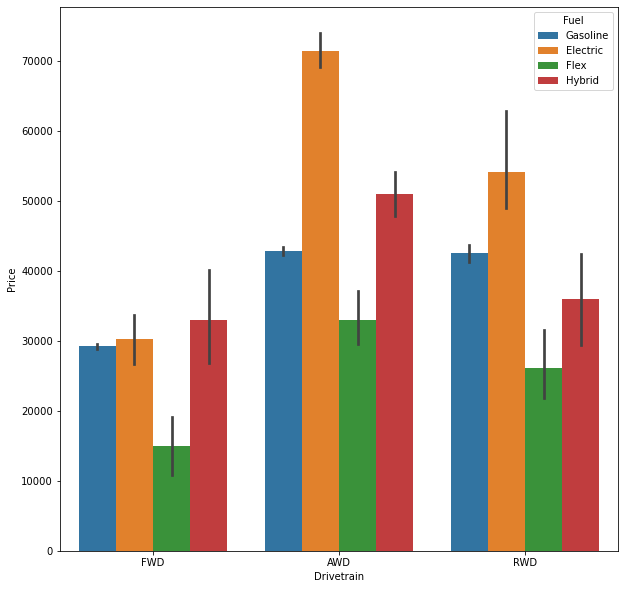

In [35]:
fig = plt.figure(figsize = (10,10))
sns.barplot(df['Drivetrain'], df['Price'], hue = df['Fuel'])

For FWD: Hybrid cars have more price followed by Electric, Gasoline and Flex<br/>
For AWD: Electric cars have more price followed by Hybrid, Gasoline and Flex<br/>
For RWD: Electric cars have more price followed by Gasoline, Hybrid and Flex<br/>

<AxesSubplot:xlabel='Used/New', ylabel='Price'>

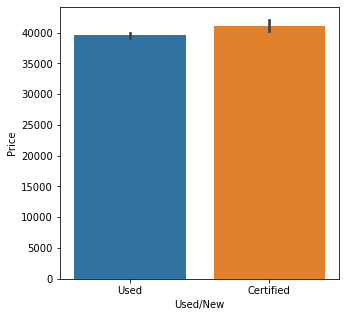

In [36]:
fig = plt.figure(figsize = (5,5))
sns.barplot(df['Used/New'], df['Price'])

Used Cars are less cost than the new cars with certification.

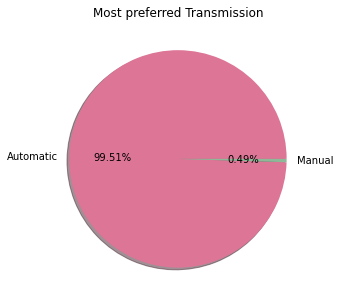

In [37]:
body = ['Automatic','Manual']
data = df["Transmission"].value_counts()
fig = plt.figure(figsize =(15,5))
colors = ['#DD7596','#8EB897',]
plt.pie(data, labels = body,autopct='%1.2f%%', shadow=True,colors=colors)
plt.title("Most preferred Transmission");

Most customers prefer to use "Automatic" Gear System Cars.

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

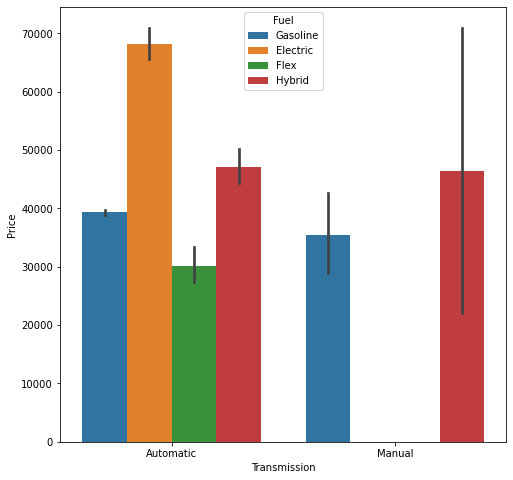

In [38]:
fig = plt.figure(figsize = (8,8))
sns.barplot(df['Transmission'], df['Price'], hue = df['Fuel'])

From the graph it is clear that:

1)Price of Electric Automatic > Hybrid Automatic > Gasoline Automatic > Flex Automatic<br/>
2)Price of Hybrid Manual > Gasoline Manual.

<AxesSubplot:xlabel='SellerRating', ylabel='Count'>

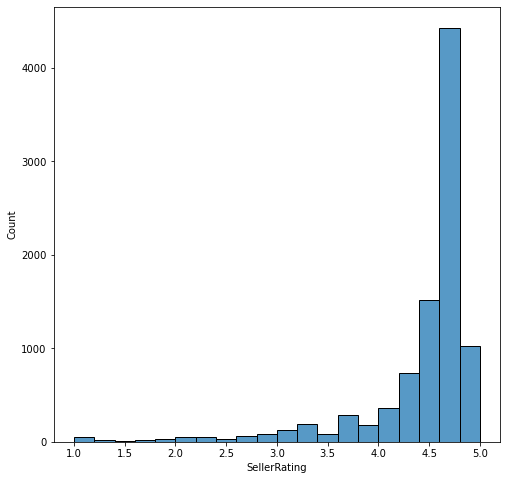

In [39]:
fig = plt.figure(figsize = (8,8))
sns.histplot(df['SellerRating'], bins = 20)

Maximum number of consumer ratings lies in the range of 4 - 5 with 4.7 rating being the most given rating

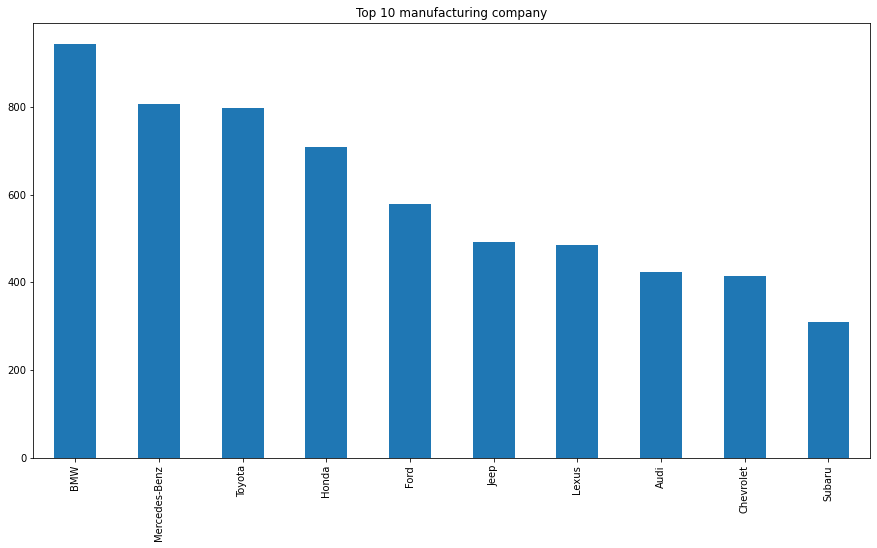

In [40]:
fig, ax = plt.subplots(figsize=(15,8))
df["Make"].value_counts().head(10).plot.bar(ax=ax)
plt.title("Top 10 manufacturing company");

This shows that BMW is the manufacturing company with the largest number. Mercedes-Benz and Toyota complete the top three.

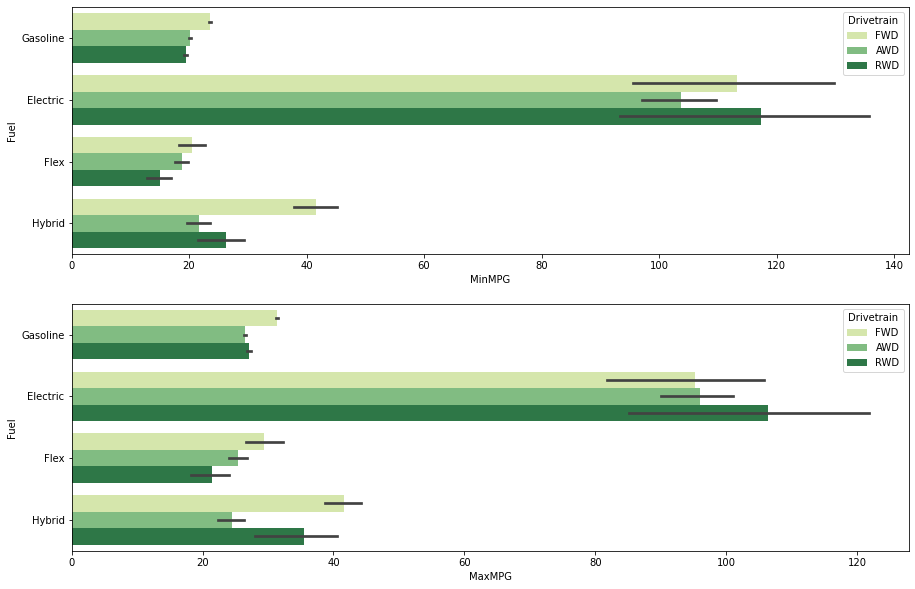

In [41]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(15,10))
sns.barplot(data=df, x="MinMPG", y="Fuel",palette='YlGn',hue="Drivetrain",ax=ax1)
sns.barplot(data=df, x="MaxMPG", y="Fuel",palette='YlGn',hue="Drivetrain",ax=ax2)
plt.show()

Here we can see that average fuel consumption is higher in the Electric type.

Text(0.5, 1.0, 'Most preferred Fuel Type used over the years')

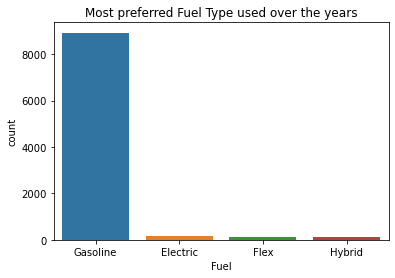

In [42]:
sns.countplot(x='Fuel', data=df, orient='h')
plt.title("Most preferred Fuel Type used over the years")

<Figure size 1800x432 with 0 Axes>

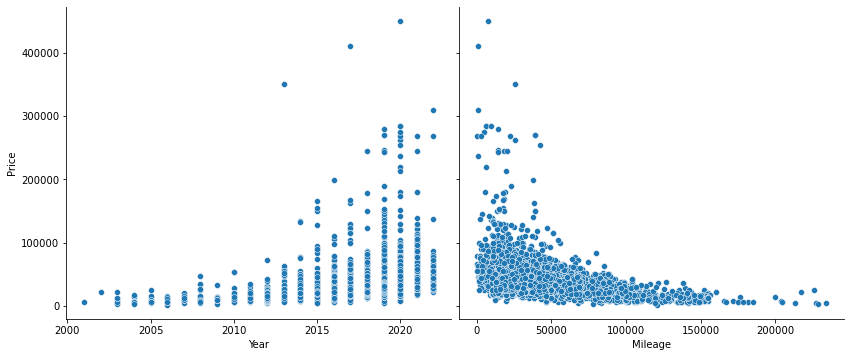

In [43]:
plt.figure(figsize=(25, 6))
sns.pairplot(df, x_vars=['Year', 'Mileage'], y_vars='Price',size=5, aspect=1.2, kind='scatter')
plt.show()

# Inference:
1) Year of manufacting seems to have a positive correlation with price, which is expected.

2) Mileage appears to have a negative correlation with price.

Text(0, 0.5, 'Count of Cars')

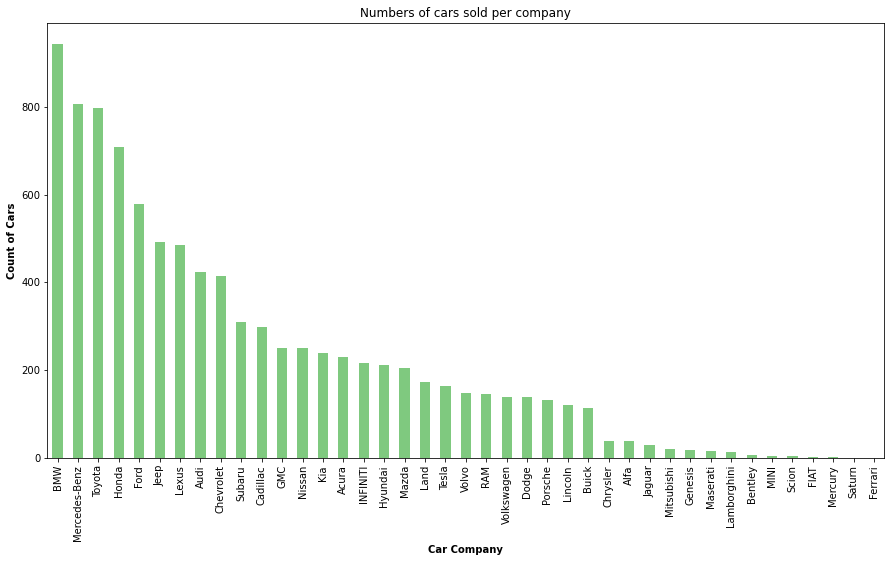

In [44]:
plt.rcParams['figure.figsize'] = [15,8]
ax = df['Make'].value_counts().plot(kind='bar', colormap = 'Accent')
ax.title.set_text('Numbers of cars sold per company')
plt.xlabel("Car Company",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

# Insights:
BMW, Mercedes-Benz,Toyota are among the most cars sold as used cars.</br>

Ferrari, Mercury, and Satum are the lowest sold cars.

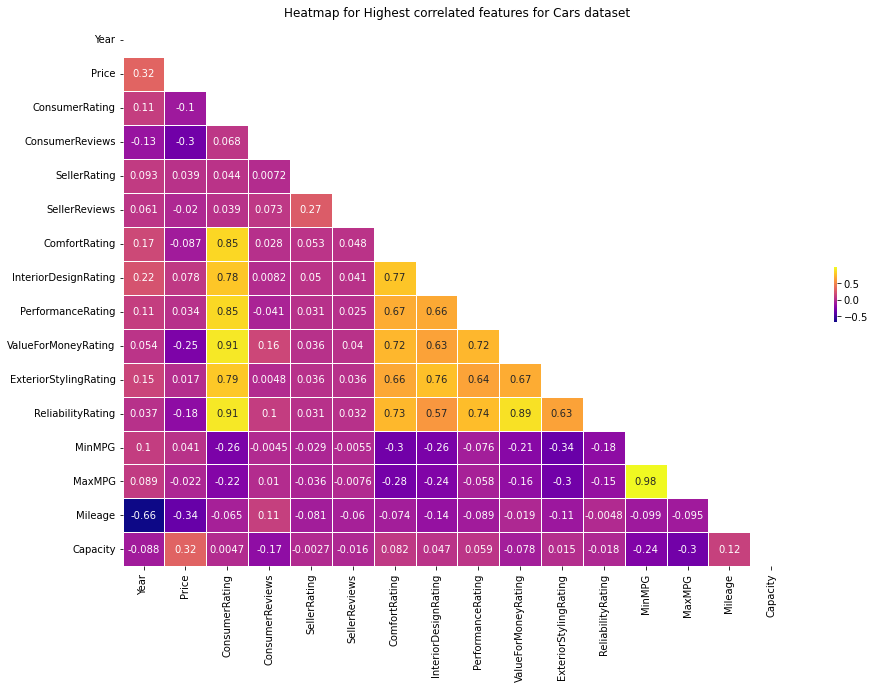

In [45]:
corr=df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, cmap='plasma', annot=True, ax=ax,
mask=mask, cbar_kws={'shrink': 0.10},linewidths=.5)
plt.title("Heatmap for Highest correlated features for Cars dataset");

<AxesSubplot:xlabel='Year', ylabel='Price'>

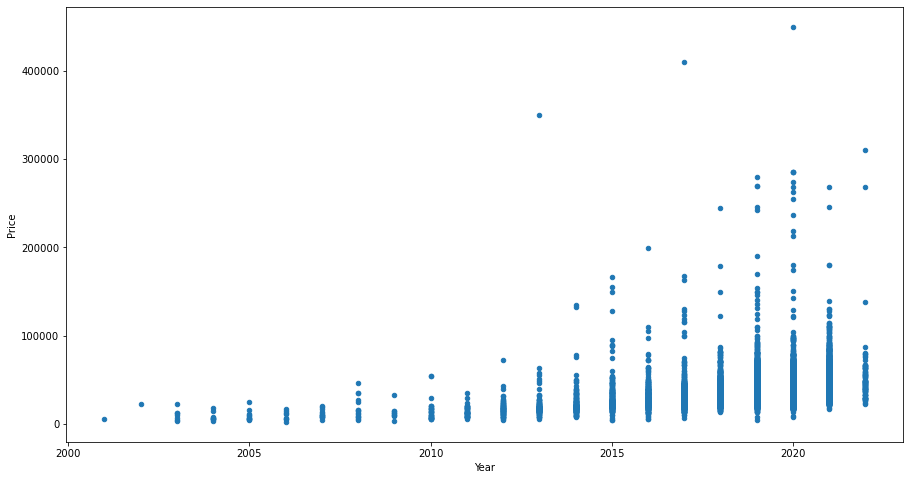

In [46]:
df.plot(kind='scatter', x='Year', y='Price')

The scatterplot above shows the relationship between year and price — newer the car is, the more expensive it’s likely to be.

<Figure size 1080x576 with 0 Axes>

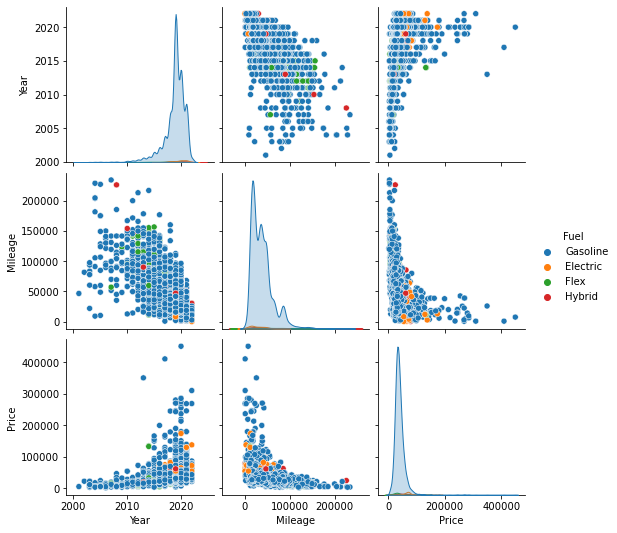

In [47]:
plt.figure()
sns.pairplot(df, vars=[ 'Year', 'Mileage', 'Price'], hue='Fuel')
plt.show()

This pairplot gives the observations: those are</BR>
-- Price varying based on Year and Mileage</br>
-- AS year increases there is an increase in the Gasoline Engine type.

In [48]:
#Importing Statistics libraray
from scipy import stats
#Python's statistics is a built-in Python library for descriptive statistics.

# ANOVA TEST
ANOVA: Analysis of Variance The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant our calculated score value is.

If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.

In [49]:
grouped_test1=df[["Transmission","Price"]].groupby(['Transmission'])
grouped_test1.head(2)

,Transmission,Price
0,Automatic,39998
1,Automatic,49985
39,Manual,34555
145,Manual,24995


In [50]:
f_val, p_val = stats.f_oneway(grouped_test1.get_group('Automatic')['Price'], grouped_test1.get_group('Manual')['Price'])
print( "ANOVA results: F=%.4f, P-value=%.4f"%(f_val,p_val))  

ANOVA results: F=1.6514, P-value=0.1988


In [51]:
grouped_test2=df[["Drivetrain","Price"]].groupby(['Drivetrain'])
grouped_test2.head(2)

,Drivetrain,Price
0,FWD,39998
1,AWD,49985
2,AWD,41860
3,FWD,28500
5,RWD,23541
7,RWD,18985


In [52]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('FWD')['Price'], grouped_test2.get_group('AWD')['Price'],grouped_test2.get_group('RWD')['Price'])
 
print( "ANOVA results: F=%.4f, P-value=%.4f"%(f_val,p_val)) 

ANOVA results: F=452.9067, P-value=0.0000


# Conclusion
1) With the help of notebook I learnt how exploratory data analysis can be carried out using Pandas plotting.</br>
2) Also I have seen making use of packages like matplotlib and seaborn to develop better insights about the data.</br>
3) I have seen the impact of columns like mileage, year and Fueltype on the Price i.e.increase/decrease rate.</br>
4) The most important inference drawn from all this analysis is, I get to know what are the features on which price is    positively and negatively coorelated with.